## Data Project Spring 2021

**Team:** Aristochats

**Members:** Theresa Berz (txj188), Adrian Moise (bln333), Nam Anh Nguyen (xgw631), Karen Thule (lnc394)


## Unemployment in different countries and age cohorts

In this project we want to investigate the unemployment rate in six different OECD countries over the time period 2007 to 2019. Using data from OECD statistics we first examine, how the unemployment rate has developped over the time timespan across countries and different ages groups. This in done in order to see, if there is any patterns or significant differences across country or age. 

**Data**

The data we use is the unemploymentrate in different age groups taken from the OECD database: 'Labour market statistics' and later the GDP per capita in US dollars, which is also taken from the OECD. 

The variables are:
- **U_15_24** : Unemployment rate age 15-24
- **U_15_64** : Unemployment rate age 15-64
- **U_25_54** : Unemployment rate age 25-54
- **U_55_64** : Unemployment rate age 55-64
- **GDP_USD** : GDP per. capita in US dollars

## Load and clean data

In [88]:
#Import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.display import Markdown, display
from numpy import array
import sympy as sm

First we load the data, that can be found in the folder:

In [89]:
#Load unemployment dataset from folder 
filename = 'data_u.xlsx' # open the file and have a look at it
data=pd.read_excel(filename)
data

,Country,Time,U_15_24,U_15_64,U_25_54,U_55_64
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8
...,...,...,...,...,...,...
373,Netherlands,Q2-2019,6.5,3.3,2.5,3.3
374,Netherlands,Q3-2019,6.7,3.3,2.5,3.2
375,Netherlands,Q4-2019,7.0,3.4,2.6,2.7
376,Netherlands,Q1-2020,6.6,3.2,2.4,2.6


We then want to investgate if there is any missing values. This is done by using the `isnull()` function that seaches for any missing values in the data-set. 

In [90]:
# Search for any missing values 
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)

#define a dataset with the missing values 
rows_with_NaN = data[row_has_NaN] 

# print the observations with missing values 
rows_with_NaN


,Country,Time,U_15_24,U_15_64,U_25_54,U_55_64
160,Germany,Q1-2020,NaN,NaN,NaN,NaN
161,Germany,Q2-2020,NaN,NaN,NaN,NaN
214,OECD - Average,Q1-2020,11.7,5.5,4.8,NaN
215,OECD - Average,Q2-2020,17.7,8.6,7.5,NaN


We want to remove the observations with missing values, this is done by using the `notna()`which does the oposite of `isnull()` i.e it finds all the observations with values and those we keep

In [91]:
#only keep observations with values (no data for 2020 unemployment in Germany and OECD-Average)
I = data['U_55_64'].notna()
data = data[I]

#round to 1 decimal 
data = data.round(decimals=1)

#rename time to quarter 
rename_dict = {} 
rename_dict['Time'] = 'Quarter'
data.rename(columns=rename_dict,inplace=True)
data


,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8
...,...,...,...,...,...,...
373,Netherlands,Q2-2019,6.5,3.3,2.5,3.3
374,Netherlands,Q3-2019,6.7,3.3,2.5,3.2
375,Netherlands,Q4-2019,7.0,3.4,2.6,2.7
376,Netherlands,Q1-2020,6.6,3.2,2.4,2.6


# Descriptive statistic 


We are now ready to look at the data. First we want to examine the data. In order to do so we use `groupby`  and `describe`

In [92]:
var = ['U_15_24', 'U_15_64'] 
data.groupby('Country')[var ].describe()

U_15_24                                                    \
                 count       mean       std   min     25%    50%     75%   
Country                                                                    
Austria           54.0   9.729630  1.054841   7.6   9.125   9.60  10.400   
Belgium           54.0  19.653704  3.346004  12.2  17.325  20.25  21.575   
Denmark           54.0  12.600000  2.684688   7.2  10.525  12.50  14.975   
France            54.0  22.081481  2.234386  17.0  20.325  22.50  23.850   
Germany           52.0   8.359615  1.920504   5.4   6.900   7.85   9.725   
Netherlands       54.0  10.051852  1.967351   6.5   8.625  10.15  11.375   
OECD - Average    52.0  14.448077  2.107269  11.4  12.400  14.35  16.525   

                     U_15_64                                               \
                 max   count      mean       std  min    25%   50%    75%   
Country                                                                     
Austria         11.8    54.0  5.161111  0.588704  3.8  4.800  5.10  5.600   
Belgium         26.2    54.0  7.427778  1.082348  5.1  6.925  7.65  8.375   
Denmark         17.0    54.0  6.246296  1.437072  3.4  5.225  6.30  7.600   
France          25.5    54.0  9.079630  1.020984  6.9  8.625  9.10  9.975   
Germany         12.4    52.0  5.584615  1.736842  3.2  4.150  5.35  7.150   
Netherlands     13.6    54.0  5.162963  1.381180  3.2  3.925  5.00  6.275   
OECD - Average  17.6    52.0  7.117308  1.133919  5.4  5.975  7.10  8.200   

                      
                 max  
Country               
Austria          6.3  
Belgium          8.7  
Denmark          8.3  
France          10.6  
Germany          9.2  
Netherlands      7.7  
OECD - Average   8.8

In [93]:
var2 = ['U_25_54', 'U_55_64']
data.groupby('Country')[var2].describe()

U_25_54                                                    \
                 count      mean       std  min    25%   50%    75%  max   
Country                                                                    
Austria           54.0  4.588889  0.575823  3.4  4.200  4.60  5.100  5.5   
Belgium           54.0  6.538889  0.952141  4.4  6.125  6.65  7.375  8.0   
Denmark           54.0  5.272222  1.285098  2.5  4.500  5.45  6.275  7.0   
France            54.0  7.911111  0.978768  6.0  7.400  8.00  8.700  9.4   
Germany           52.0  5.138462  1.581034  3.0  3.850  4.85  6.650  8.5   
Netherlands       54.0  3.996296  1.279145  2.3  2.800  3.80  5.025  6.4   
OECD - Average    52.0  6.251923  1.013341  4.8  5.100  6.30  7.200  7.7   

               U_55_64                                                     
                 count      mean       std  min    25%   50%    75%   max  
Country                                                                    
Austria           54.0  3.598148  0.832022  1.9  3.200  3.60  4.000   5.2  
Belgium           54.0  3.598148  0.832022  1.9  3.200  3.60  4.000   5.2  
Denmark           54.0  4.420370  1.098606  2.3  3.600  4.15  5.500   6.3  
France            54.0  6.162963  1.096529  3.8  5.700  6.35  7.075   7.7  
Germany           52.0  5.763462  2.280783  2.6  3.750  5.70  7.725  11.1  
Netherlands       54.0  5.224074  1.646028  2.5  4.200  4.70  6.675   8.2  
OECD - Average    52.0  4.915385  0.811531  3.7  4.075  5.00  5.700   6.1

From the above we see that generally the unemployment rate is highest for the youngest cohort (age 15-24) in all countries and for the OECD average, where France has the higest mean of 22.08, and a max of the period of 25.5 pct, i.e a some point during the period a quarter of people in the age 15-24 were unemployed in France. The lowest means are found in the oldest cohort (55-64), except for Germany, where the lowest mean is found in the age cohort 25-54. 

We now want to plot the unemployment rate of each country in order to see, how they have developed over the time period. 

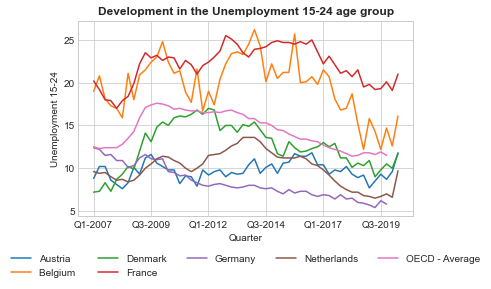

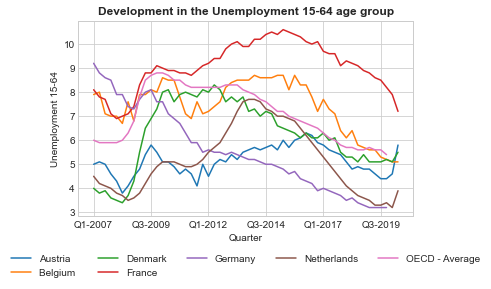

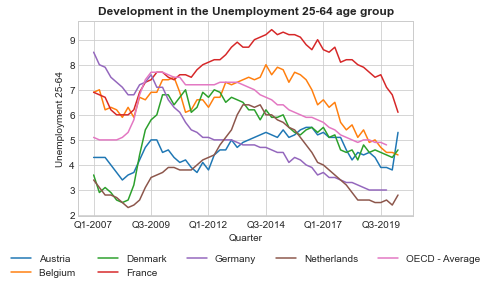

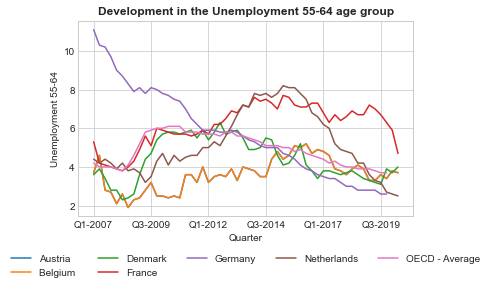

In [94]:
#plot the first age cohort by looping over the 4 unemployment groups

def plot_unempl(column,name,title=''):
    fig = plt.figure()
    ax = plt.subplot(111)
    data.set_index('Quarter').groupby('Country')[column].plot(kind='line', legend=True, ax=ax)
    ax.set_ylabel(name)
    ax.set_title(title)
    box = ax.get_position()
    ax.set_title(f'Development in the {name} age group',fontweight="bold")
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9]) # shrink height by 10% at bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # Put a legend below current axis
columns = ['U_15_24','U_15_64','U_25_54','U_55_64']
names   = ['Unemployment 15-24','Unemployment 15-64','Unemployment 25-64','Unemployment 55-64']
for column,name in zip(columns,names):
    plot_unempl(column,name)


When looking at the figures, one sees a pattern of falling unemployment rates in all countries in the quarters leading up to the financial crisis in 2008, whereafter the general pattern is rising unemployment rates. In the three first age cohorts (15-24, 15-64 and 25-54) France and Belgium has had the highest rates of unemployment throughout most of the investigated period, while Austria seems to have had a lower and a bit more steady unemployment rate. 
When looking at Germany we see quite a different pattern compared to the rest of the countries and the OECD - Average. Germany has (except for small jumps around 2008) had a clear falling trend throughout the entire period, the strongest one for the oldest age cohort and the smallest for the youngest. This shows, that even though we are comparing six OECD countries, that have all been exposed to the financial crisis and what followed, we are able to see very different patterns. This leads us to asking the question, what might explain this difference. However, before doing so, we will have a look at how each country is compared to the OECD average. 

## Deviation from OECD 

We create a list to make it possible to drop 'Country', and 'Quarter' for the loop that follows

In [95]:
list__ = data.columns.drop(pd.Index(['Country','Quarter']))
list__


Index(['U_15_24', 'U_15_64', 'U_25_54', 'U_55_64'], dtype='object')

We create a loop that takes the OECD - Average data for all unemployment groups and stores it as seperate columns. 

In [96]:
for name in list__:
    B = (data['Country']=='OECD - Average')
    New2 = data.loc[B,['Quarter',name]].rename(columns={name:f'{name}_OECD'})
    data = data.merge(New2,on='Quarter', how='left')
    
data

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9
...,...,...,...,...,...,...,...,...,...,...
369,Netherlands,Q2-2019,6.5,3.3,2.5,3.3,11.6,5.6,4.9,3.8
370,Netherlands,Q3-2019,6.7,3.3,2.5,3.2,11.9,5.6,4.9,3.7
371,Netherlands,Q4-2019,7.0,3.4,2.6,2.7,11.5,5.4,4.8,3.7
372,Netherlands,Q1-2020,6.6,3.2,2.4,2.6,NaN,NaN,NaN,NaN


Now that we have the OECD - Average for all groups on seperate columns, we are able to create new variables. We loop over the unemployment groups and use the lambda function to be able to store the result as columns. 

In [97]:
age_groups= ['15_24','15_64','25_54','55_64']
for age_group in age_groups:
        data[f'diff_oecd_{age_group}'] = data.apply(lambda x: x[f'U_{age_group}_OECD'] - x[f'U_{age_group}'], axis=1)
data

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2,5.3,2.0,1.5,0.6
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0,5.0,2.1,2.1,0.1
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0,4.1,2.0,1.9,0.6
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0,5.1,2.3,2.1,1.2
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9,3.7,2.4,2.4,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Netherlands,Q2-2019,6.5,3.3,2.5,3.3,11.6,5.6,4.9,3.8,5.1,2.3,2.4,0.5
370,Netherlands,Q3-2019,6.7,3.3,2.5,3.2,11.9,5.6,4.9,3.7,5.2,2.3,2.4,0.5
371,Netherlands,Q4-2019,7.0,3.4,2.6,2.7,11.5,5.4,4.8,3.7,4.5,2.0,2.2,1.0
372,Netherlands,Q1-2020,6.6,3.2,2.4,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that there are some missing values, therefor we remove these as done previous using `notna()`

In [98]:
# Search for any missing values 
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)

#define a dataset with the missing values 
rows_with_NaN = data[row_has_NaN] 

# print the observations with missing values 
rows_with_NaN

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64
52,Denmark,Q1-2020,10.0,5.1,4.3,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Denmark,Q2-2020,11.7,5.5,4.6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,France,Q1-2020,19.1,7.9,6.8,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,France,Q2-2020,21.0,7.2,6.1,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Austria,Q1-2020,9.6,4.6,3.8,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Austria,Q2-2020,11.8,5.8,5.3,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,Belgium,Q1-2020,12.6,5.1,4.5,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,Belgium,Q2-2020,16.1,5.1,4.4,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,Netherlands,Q1-2020,6.6,3.2,2.4,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,Netherlands,Q2-2020,9.7,3.9,2.8,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#only keep observations with values 
I = data['U_55_64_OECD'].notna()
data = data[I]

#round to 1 decimal 
data = data.round(decimals=1)

#rename time to quarter 
rename_dict = {} 
rename_dict['Time'] = 'Quarter'
data.rename(columns=rename_dict,inplace=True)
data

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2,5.3,2.0,1.5,0.6
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0,5.0,2.1,2.1,0.1
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0,4.1,2.0,1.9,0.6
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0,5.1,2.3,2.1,1.2
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9,3.7,2.4,2.4,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Netherlands,Q4-2018,6.8,3.6,2.6,4.2,11.8,5.6,5.0,3.9,5.0,2.0,2.4,-0.3
368,Netherlands,Q1-2019,6.7,3.5,2.6,3.6,11.8,5.7,5.0,3.9,5.1,2.2,2.4,0.3
369,Netherlands,Q2-2019,6.5,3.3,2.5,3.3,11.6,5.6,4.9,3.8,5.1,2.3,2.4,0.5
370,Netherlands,Q3-2019,6.7,3.3,2.5,3.2,11.9,5.6,4.9,3.7,5.2,2.3,2.4,0.5


We are now able to plot the results. y=0 is the OECD average. Thus, for all positive values of y>0, the country's respective unemployment rate is lower than the OECD average and vice versa. 

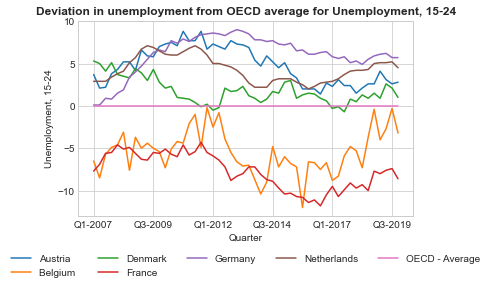

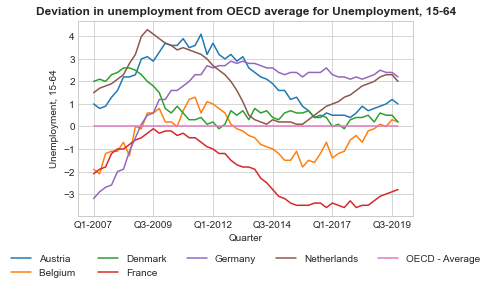

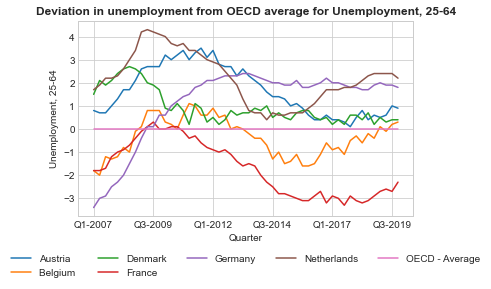

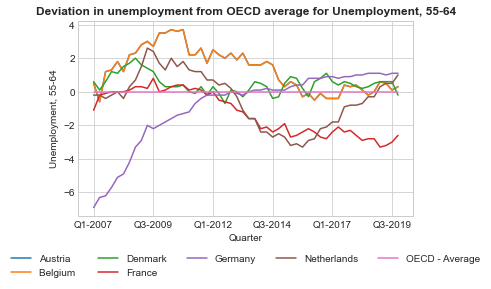

In [100]:
def plot_unempl_deviation(column,name,title=''):
    fig = plt.figure()
    ax = plt.subplot(111)
    data.set_index('Quarter').groupby('Country')[column].plot(kind='line', legend=True, ax=ax)
    ax.set_ylabel(name)
    ax.set_title(title)
    box = ax.get_position()
    ax.set_title(f'Deviation in unemployment from OECD average for {name}',fontweight="bold")
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9]) # shrink height by 10% at bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5); # Put a legend below current axis
columns = ['diff_oecd_15_24','diff_oecd_15_64','diff_oecd_25_54','diff_oecd_55_64']
names   = ['Unemployment, 15-24','Unemployment, 15-64','Unemployment, 25-64','Unemployment, 55-64']
for column,name in zip(columns,names):
    plot_unempl_deviation(column,name)


The plots display that the unemployment devation from OECD average varies a lot between the six chosen countries, where sepcially France stands out with negative diviation in all age cohorts except 55-65. Notice that, except for the youngest age cohort Germany has the highest negative deviation for all age cohorts, in the beginning of the time periode i.e. the highest unemployment rate compared to the OECD-Average. However in the following years they "catch up" and move towards a positive deviation i.e a lower unemployment rate than OECD average. 

## Adding GDP

In the previous tables and figures we have seen how six different OECD countries have had very different unemployment rates - both in terms of levels and developments. This naturally leads to asking what might have cause this difference. As mentioned before, one factor that might explain some of the differences could be the financial crisis. We therefore try to add GDP to the data in order to see if, there might be any connection between the development in the two variables. 

We therefore load another datafile containing data for GDP per capita in the six chosen countries. 

In [101]:
#load GDP dataset from folder 
filename = 'data_gdp.xlsx' # open the file and have a look at it
dataGDP=pd.read_excel(filename)


#rename time to quarter 
rename_dict = {} 
rename_dict['Time'] = 'Quarter'
dataGDP.rename(columns=rename_dict,inplace=True)
dataGDP

,Country,Quarter,GDP_USD
0,Denmark,Q1-2007,38222.3
1,Denmark,Q2-2007,38342.6
2,Denmark,Q3-2007,39136.4
3,Denmark,Q4-2007,40178.8
4,Denmark,Q1-2008,40983.6
...,...,...,...
373,Netherlands,Q2-2019,59387.3
374,Netherlands,Q3-2019,59627.0
375,Netherlands,Q4-2019,59985.6
376,Netherlands,Q1-2020,59243.9


We then merge it with the unemployment data

In [102]:
#merge gdp data and unemployment data
data2 = pd.merge(data,dataGDP,on=['Country','Quarter'],how='outer')
data2

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64,GDP_USD
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2,5.3,2.0,1.5,0.6,38222.3
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0,5.0,2.1,2.1,0.1,38342.6
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0,4.1,2.0,1.9,0.6,39136.4
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0,5.1,2.3,2.1,1.2,40178.8
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9,3.7,2.4,2.4,1.1,40983.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Austria,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50794.5
374,Belgium,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53695.7
375,Belgium,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47097.7
376,Netherlands,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59243.9


As earlier we seach for any missing values and remove them

In [103]:
# Search for any missing values 
is_NaN = data2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data2[row_has_NaN]

rows_with_NaN

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64,GDP_USD
364,Denmark,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60786.6
365,Denmark,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56527.9
366,France,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46793.8
367,France,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39965.9
368,Germany,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55401.2
369,Germany,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49784.8
370,OECD - Average,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46186.6
371,OECD - Average,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41132.4
372,Austria,Q1-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57203.7
373,Austria,Q2-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50794.5


In [104]:
#remove missing values 
I = data2['U_15_64_OECD'].notna()
data2 = data2[I]
data2


,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64,GDP_USD
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2,5.3,2.0,1.5,0.6,38222.3
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0,5.0,2.1,2.1,0.1,38342.6
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0,4.1,2.0,1.9,0.6,39136.4
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0,5.1,2.3,2.1,1.2,40178.8
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9,3.7,2.4,2.4,1.1,40983.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Netherlands,Q4-2018,6.8,3.6,2.6,4.2,11.8,5.6,5.0,3.9,5.0,2.0,2.4,-0.3,58596.7
360,Netherlands,Q1-2019,6.7,3.5,2.6,3.6,11.8,5.7,5.0,3.9,5.1,2.2,2.4,0.3,58904.7
361,Netherlands,Q2-2019,6.5,3.3,2.5,3.3,11.6,5.6,4.9,3.8,5.1,2.3,2.4,0.5,59387.3
362,Netherlands,Q3-2019,6.7,3.3,2.5,3.2,11.9,5.6,4.9,3.7,5.2,2.3,2.4,0.5,59627.0


Before looking at umeployment and GDP togther we want to have a look at the development in the GDP per capita in the six countires and the OECD-average over the chosen period. We therefor plot the GDP data

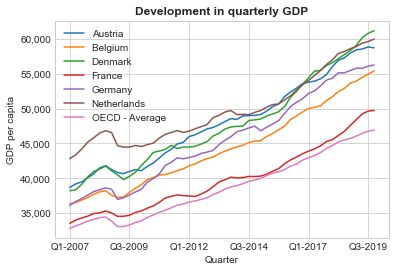

In [105]:
# plot GDP 
fig = plt.figure()
ax = plt.subplot(111)
data2.set_index("Quarter").groupby("Country")["GDP_USD"].plot(kind="line", legend=True, ax=ax)
#ax.set_ylim([None,65000])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #allows for thousand number seperator
ax.set_ylabel("GDP per capita")
ax.set_title("Development in quarterly GDP", fontweight="bold")
box = ax.get_position()
#ax.get_ylabel().set_major_formatter(plt.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) #Thousand separator on y-axis but doesnt work
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 1]) 



Previously we showed that all countries had very different patterns of unemployment development. We have also mentioned the financial crisis as a factor that led to a decrease in employment. Thus, one could assume, that unemployment and the economic development of a country could be very related . However, the above figure shows that the causal relationship between employment and the economy, aproximated by GDP, might not be as significant as one might thought. We can see, that all countries had a very similar development in GDP, however they differ significantly in the change of unemployment.

## Correlation between unemployment and GDP

In order to further check if the unemployment and the economic development of a country could be related, we plot the log difference between unemployment rate according to the log difference between the GDP per capita, i.e. checking if the variation of unemployment rate is related to the variation of GDP per capita.

First we drop the OECD-Average since we only want to look at the six countires

In [106]:
pd.options.mode.chained_assignment = None  

#Dropping the OCED - Average

data2.drop(data2[data2["Country"] == "OECD - Average"].index, inplace=True)





We then apply logs to every variable via. a loop

In [107]:
#Applying logs on different age groupes
new_groups= ["U_15_24","U_15_64","U_25_54","U_55_64","GDP_USD"]
for new_group in new_groups:
        data2[f"log_{new_group}"] = data2[new_group].apply(lambda x: np.log(x))
data2

,Country,Quarter,U_15_24,U_15_64,U_25_54,U_55_64,U_15_24_OECD,U_15_64_OECD,U_25_54_OECD,U_55_64_OECD,diff_oecd_15_24,diff_oecd_15_64,diff_oecd_25_54,diff_oecd_55_64,GDP_USD,log_U_15_24,log_U_15_64,log_U_25_54,log_U_55_64,log_GDP_USD
0,Denmark,Q1-2007,7.2,4.0,3.6,3.6,12.5,6.0,5.1,4.2,5.3,2.0,1.5,0.6,38222.3,1.974081,1.386294,1.280934,1.280934,10.551174
1,Denmark,Q2-2007,7.3,3.8,2.9,3.9,12.3,5.9,5.0,4.0,5.0,2.1,2.1,0.1,38342.6,1.987874,1.335001,1.064711,1.360977,10.554317
2,Denmark,Q3-2007,8.3,3.9,3.1,3.4,12.4,5.9,5.0,4.0,4.1,2.0,1.9,0.6,39136.4,2.116256,1.360977,1.131402,1.223775,10.574808
3,Denmark,Q4-2007,7.3,3.6,2.9,2.8,12.4,5.9,5.0,4.0,5.1,2.3,2.1,1.2,40178.8,1.987874,1.280934,1.064711,1.029619,10.601095
4,Denmark,Q1-2008,8.7,3.5,2.6,2.8,12.4,5.9,5.0,3.9,3.7,2.4,2.4,1.1,40983.6,2.163323,1.252763,0.955511,1.029619,10.620927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Netherlands,Q4-2018,6.8,3.6,2.6,4.2,11.8,5.6,5.0,3.9,5.0,2.0,2.4,-0.3,58596.7,1.916923,1.280934,0.955511,1.435085,10.978434
360,Netherlands,Q1-2019,6.7,3.5,2.6,3.6,11.8,5.7,5.0,3.9,5.1,2.2,2.4,0.3,58904.7,1.902108,1.252763,0.955511,1.280934,10.983676
361,Netherlands,Q2-2019,6.5,3.3,2.5,3.3,11.6,5.6,4.9,3.8,5.1,2.3,2.4,0.5,59387.3,1.871802,1.193922,0.916291,1.193922,10.991836
362,Netherlands,Q3-2019,6.7,3.3,2.5,3.2,11.9,5.6,4.9,3.7,5.2,2.3,2.4,0.5,59627.0,1.902108,1.193922,0.916291,1.163151,10.995864


We now want to plot the correlation between unemployment rate and GDP per capita. First we create a dictionary in order to have proper names for our variables

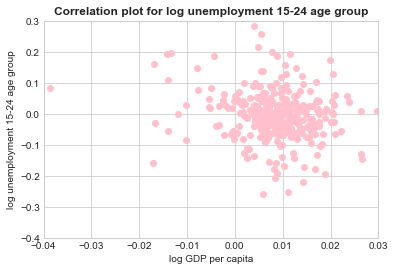

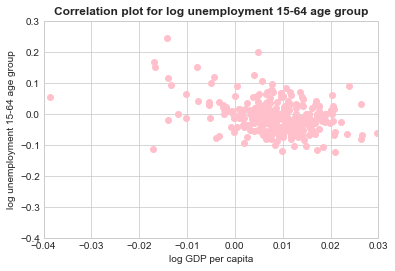

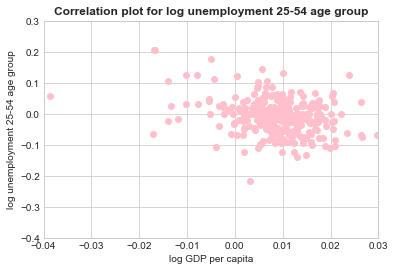

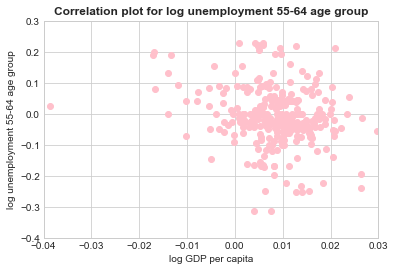

In [108]:
#We create a dictionary to attach a proper name for our variables
var = {}
var["log_U_15_24"] = "log unemployment 15-24 age group"
var["log_U_15_64"] = "log unemployment 15-64 age group"
var["log_U_25_54"] = "log unemployment 25-54 age group"
var["log_U_55_64"] = "log unemployment 55-64 age group"
var["log_GDP_USD"] = "log GDP per capita"

    
x_col = "log_GDP_USD"
y_columns = ["log_U_15_24","log_U_15_64","log_U_25_54","log_U_55_64"]


for y_col in y_columns:

    figure = plt.figure()
    ax = plt.gca()
    ax.scatter(data2[x_col].diff(1), data2[y_col].diff(1),color = "#FFC0CB")
    ax.set_xlim([-0.04,0.03])
    ax.set_ylim([-0.4,0.3])
    ax.set_xlabel(f"{var[x_col]}")
    ax.set_ylabel(f"{var[y_col]}")
    ax.set_title(f"Correlation plot for {var[y_col]}", fontweight="bold")
    plt.show()

The correlation coefficient between the unemployment rate and the GDP per capita is then found as

In [109]:

def fancy(string): 
    """ A function that allows us to write markdown text (and LaTex) inside the fancy function
    args:
    string : a string
    
    returns : a string i an fancy way"""
    display(Markdown(string))
    
for y_col in y_columns: #We create a loop that calculates the correlation coefficient
    """
    args:
    y_col: log of unemployment for different age groups
    x_col: log of GDP per capita
    """
    corr = data2[y_col].corr(data2[x_col])
    fancy(f"$\hat\sigma_{{YX}}=${corr:.3} for {var[y_col]} and {var[x_col]}.")



$\hat\sigma_{YX}=$-0.484 for log unemployment 15-24 age group and log GDP per capita.

$\hat\sigma_{YX}=$-0.503 for log unemployment 15-64 age group and log GDP per capita.

$\hat\sigma_{YX}=$-0.472 for log unemployment 25-54 age group and log GDP per capita.

$\hat\sigma_{YX}=$-0.156 for log unemployment 55-64 age group and log GDP per capita.

As we can see the distribution of the plot is very large, and there does not seem to be any clear connection between the two variables. However the shown correlaton coefficients show, that there is some correlation between the two variables, and as expected the correlation is negative.

## Conclusion 

In this project we wanted to investigate the unemployment rate in six different OECD countries. Using two datasets: one with the unemployment rate and one with the GDP, we have shown how the countries have developed over the period of 2007 Q1 to 2019 Q4. 

Using descriptive statistics and plotting we saw very different patterns in unemployment. However, when adding the information of the development in the GDP we have seen, that these differences cannot only be explained by differences in GDP, as the causal relationship does not seem to be as significant as one might would have expected. 